### Installation des librairies

In [1]:
import tensorflow as tf

#import tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
# importer le Fashion MNIST dataset.

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
class_names = metadata.features['label'].names
print("Class name: {}".format(class_names))

Class name: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Exploration de données

In [5]:
# Explorons d'abord le format des données avant l'entrainement du modele, la suite montre qu'il y'a 60000 image dans le train set et 
# 10000 images dans le test set

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("number of training examples: {}".format(num_train_examples))
print("number of testing examples: {}".format(num_test_examples))

number of training examples: 60000
number of testing examples: 10000


### Pré-traitement de données
la valeur de chaque pixel dans les données d'images est un entier compris entre [0, 255] pour que le model travail proprement dans ce travail nous allons normaliser les valeurs dans [0, 1]. donc nous crayons une fonction de normalisation, et l'appliquons sur chaque image du train et du test set.

In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

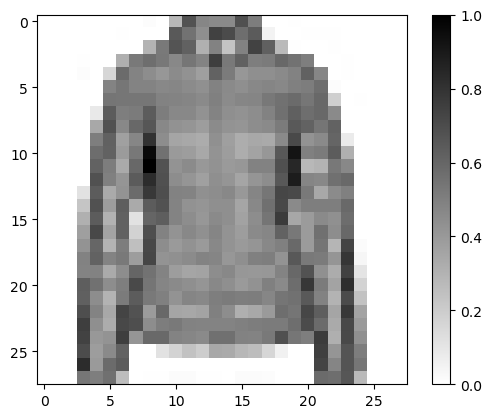

In [7]:
# retirons la dimension couleur et faisons un reshape

for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

# Représentation de l'image

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### Construction du modele

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [10]:
#Compilation du modele

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])